<a href="https://colab.research.google.com/github/gonzs/first-example-tensorflow/blob/master/FirstExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


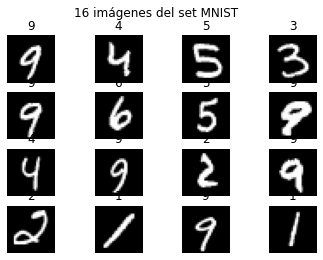

In [3]:
ids_imgs = np.random.randint(0,x_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

In [0]:
X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )


In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [7]:
#
# Creación del modelo:
# - Capa de entrada: su dimensión será 784 (el tamaño de cada imagen aplanada)
# - Capa oculta: 15 neuronas con activación ReLU
# - Capa de salida: función de activación 'softmax' (clasificación multiclase) y un
#     total de 10 categorías
#
np.random.seed(1)		# Para reproducibilidad del entrenamiento
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

modelo = Sequential()
modelo.add( Dense(15, input_dim=input_dim, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))
print(modelo.summary())

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#
# Compilación y entrenamiento: gradiente descendente, learning rate = 0.05, función
# de error: entropía cruzada, métrica de desempeño: precisión

sgd = SGD(lr=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [9]:
# Para el entrenamiento se usarán 30 iteraciones y un batch_size de 1024
num_epochs = 200
batch_size = 2048
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)


Epoch 1/200
 - 2s - loss: 1.5617 - accuracy: 0.5124
Epoch 2/200
 - 0s - loss: 0.7109 - accuracy: 0.8218
Epoch 3/200
 - 0s - loss: 0.5058 - accuracy: 0.8650
Epoch 4/200
 - 0s - loss: 0.4303 - accuracy: 0.8808
Epoch 5/200
 - 0s - loss: 0.3901 - accuracy: 0.8898
Epoch 6/200
 - 0s - loss: 0.3634 - accuracy: 0.8971
Epoch 7/200
 - 0s - loss: 0.3442 - accuracy: 0.9019
Epoch 8/200
 - 0s - loss: 0.3292 - accuracy: 0.9059
Epoch 9/200
 - 0s - loss: 0.3174 - accuracy: 0.9089
Epoch 10/200
 - 0s - loss: 0.3080 - accuracy: 0.9119
Epoch 11/200
 - 0s - loss: 0.2998 - accuracy: 0.9141
Epoch 12/200
 - 0s - loss: 0.2925 - accuracy: 0.9160
Epoch 13/200
 - 0s - loss: 0.2859 - accuracy: 0.9175
Epoch 14/200
 - 0s - loss: 0.2807 - accuracy: 0.9191
Epoch 15/200
 - 0s - loss: 0.2765 - accuracy: 0.9199
Epoch 16/200
 - 0s - loss: 0.2712 - accuracy: 0.9218
Epoch 17/200
 - 0s - loss: 0.2677 - accuracy: 0.9227
Epoch 18/200
 - 0s - loss: 0.2638 - accuracy: 0.9239
Epoch 19/200
 - 0s - loss: 0.2602 - accuracy: 0.9253
Ep

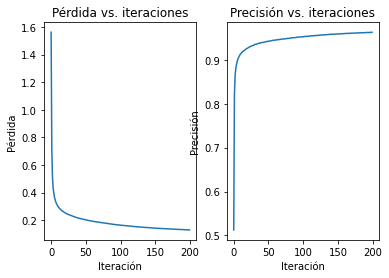

In [16]:
#
# Resultados
#

# Error y precisión vs iteraciones
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

plt.show()


Precisión en el set de validación: 95.1%


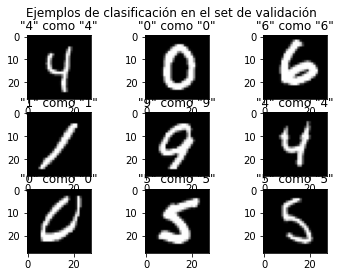

In [18]:
# Calcular la precisión sobre el set de validación
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

# Realizar predicción sobre el set de validación y mostrar algunos ejemplos
# de la clasificación resultante
Y_pred = modelo.predict_classes(X_test)

ids_imgs = np.random.randint(0,X_test.shape[0],9)
for i in range(len(ids_imgs)):
	idx = ids_imgs[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = Y_pred[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('on')
	plt.title('"{}" como "{}"'.format(cat_original,cat_prediccion))

plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()